# Pré-processamento das avaliações armazenada em um arquivo CSV

Nessa etapa serão aplicadas técnicas de pré-processamento como meio de remover ruídos das avaliações, facilitando o processo posterior de extração de características.

## Obtenção dos dados do Arquivo CSV para um DataFrame pandas

O código abaixo é responsável por abrir um arquivo CSV contendo as avaliações de usuários manualmente categorizadas e os alocar na estrutura de um DataFrame da biblioteca pandas

In [ ]:
import pandas as pd

df = pd.read_csv('avaliacoes_classificadas_todos_apps.csv')

## Remoção de ruídos

Nessa etapa serão feitas as seguintes tarefas na coluna "content", que contém as avaliações dos usuários:
- Deixar todos os textos em minúsculo
- Remover caracteres alfanuméricos, caracteres de pontuação, emojis
- Remover acentuação das palavras


### Aplicação de método para deixar textos em minúsculo

In [ ]:
df["content"] = df["content"].str.lower()

### Remoção de caracteres alfanuméricos, caracteres de pontuação e emojis

 Criação de uma função para remoção de caracteres especiais, como números, pontuação e emojis dos textos.

In [ ]:
import re
import string

def remover_caracteres_especiais(texto):
    # Remove caracteres de pontuação
    texto = texto.translate(str.maketrans('', '', string.punctuation))

    # Remove caracteres alfanuméricos
    texto = re.sub(r'\w*\d\w*', '', texto)

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # símbolos & pictogramas
                               u"\U0001F680-\U0001F6FF"  # transporte & símbolos de mapa
                               u"\U0001F1E0-\U0001F1FF"  # bandeiras de paises
                               u"\U00002702-\U000027B0"  # emojis diversos, como lapis, envelope, tesoura, etc
                               u"\U000024C2-\U0001F251"  # emojis diversos referentes ao amanhecer, ondas, nevoa, etc
                               "]+", flags=re.UNICODE)
    texto = emoji_pattern.sub(r'', texto)

    return texto

Remoção dos caracteres especiais das avaliações dos usuários, contidos na coluna "content" do dataframe

In [ ]:
df['content'] = df['content'].apply(remover_caracteres_especiais)

### Remoção da acentuação das palavras, contidas na coluna "content" do dataframe

Para a remoção da acentuação das palavras, será utilizada a biblioteca python Unidecode ([PyPi Unidecode](https://pypi.org/project/Unidecode/)). Ela disponibiliza uma função "unidecode", que tenta transformar um texto em caracteres ASCII. Para línguas de origem ocidental, ela tem a capacidade de fazer essa transformação sem problemas já as orientais, devido a sua complexidade, nem sempre é possível. Dessa forma, visto que a linguagem utilizada será o Português, prevê-se que essa tarefa será feita sem problemas.

In [ ]:
#Instalacao da biblioteca unidecode
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 14.2 MB/s eta 0:00:00


Criação de uma função que remove acentuação de um texto

In [ ]:
from unidecode import unidecode

def remover_acentuacao(texto):
    texto_sem_acentuacao = unidecode(texto)
    return texto_sem_acentuacao


Remoção da acentuação das palavras contidas nas avaliações dos usuários, contidas na coluna "content" do dataframe

In [ ]:
#Remove acentuação das palavras de todas as avaliações contidas na coluna "content" do dataframe
df['content'] = df['content'].apply(remover_acentuacao)

## Remoção de Stopwords

Nessa etapa será utilizada a biblioteca NLTK, para que seja possível aplicar métodos que removem as palavras de parada (stopwords). A partir daqui existiram duas bases de dados, uma na qual as stopwords são utilizadas e outra que não possui stopwords.


In [ ]:
#Fazendo uma copia do dataframe original, para manter as stopwords

#Dataframe contendo stopwords
df_stopwords = df.copy()

Instalação da biblioteca NLTK, configuração do tokenizer e obtenção da lista de stopwords da língua portuguesa

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar o conjunto de stopwords da NLTK
nltk.download('stopwords')

# Baixar o tokenizer da NLTK
nltk.download('punkt')

# Definir o conjunto de stopwords da lingua portuguesa
lista_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Função para remoção de stopwords

In [ ]:
# Função para remover stopwords do texto
def remover_stopwords(texto):
    # Tokenizar o texto em palavras
    palavras = word_tokenize(texto)

    # Filtrar as stopwords dos tokens
    palavras_filtradas = [palavra for palavra in palavras if palavra.lower() not in lista_stopwords]

    # Juntar as palavras novamente em um texto
    texto_filtrado = ' '.join(palavras_filtradas)

    return texto_filtrado

Remoção das stopwords das avaliações dos usuários, contidas na coluna "content" do dataframe

In [ ]:
df["content"] = df["content"].apply(remover_stopwords)

## Stemização dos textos usando RSLPStemmer

A biblioteca NLTK disponibiliza o [stemmer RSLP](https://www.nltk.org/_modules/nltk/stem/rslp.html), que foca na stemização de palavras de língua portuguesa.



In [ ]:
from nltk.stem import RSLPStemmer

# Baixar o conjunto de dados necessário
nltk.download('rslp')

# Criar um objeto stemmer RSLP
stemmer = RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


Função que realiza a stemização de um dado texto

In [ ]:
def realizar_stemizacao(texto):
    # Tokenizar o texto em palavras
    palavras = nltk.word_tokenize(texto)

    # Aplicar a stemizacao em cada palavra
    palavras_stemizadas = [stemmer.stem(palavra) for palavra in palavras]

    # Juntar as palavras novamente em um texto
    texto_stemizado = ' '.join(palavras_stemizadas)

    return texto_stemizado

Aplicação da técnica de stemização nas avaliações dos usuários, contidas na coluna "content" dos dataframes que possuem stopwords e que não possuem stopwords.

In [ ]:
#DataFrame possuindo: stopwords, stemizacao
df_stopwords_stemizacao = df_stopwords.copy()
df_stopwords_stemizacao["content"] = df_stopwords_stemizacao["content"].apply(realizar_stemizacao)

#DataFrame possuindo: stemizacao
df_stemizacao = df.copy()
df_stemizacao["content"] = df_stemizacao["content"].apply(realizar_stemizacao)

## Lematização dos textos usando Spacy

A biblioteca NLTK disponibiliza não possui um lematizador para a língua portuguesa, dessa forma será necessária a utilização de uma biblioteca alternativa. A partir disso, será utilizado o Spacy que possui suporte para diversos idiomas, incluindo o português.

In [ ]:
# Instalação ncessária para utilizar spacy para lingua portuguesa
!pip install spacy
!python -m spacy download pt_core_news_sm

import spacy

# Carregar o modelo do idioma português
nlp = spacy.load('pt_core_news_sm')


2023-07-12 21:35:03.993808: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-12 21:35:05.220119: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 72.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


Função que realiza a lematização de um dado texto

In [ ]:
def realizar_lematizacao(texto):
    # Obtenção dos tokens do texto com o modelo do Spacy
    tokens = nlp(texto)

    # Aplicar a lematização em cada token do texto
    palavras_lematizadas = [token.lemma_ for token in tokens]

    # Juntar as palavras novamente em um texto
    texto_lematizado = ' '.join(palavras_lematizadas)

    return texto_lematizado

Aplicação da técnica de stemização nas avaliações dos usuários, contidas na coluna "content" dos dataframes que possuem stopwords e que não possuem stopwords.

In [ ]:
#DataFrame possuindo: stopwords, lematizacao
df_stopwords_lematizacao = df_stopwords.copy()
df_stopwords_lematizacao["content"] = df_stopwords_lematizacao["content"].apply(realizar_lematizacao)

#DataFrame possuindo: lematizacao
df_lematizacao = df.copy()
df_lematizacao["content"] = df_lematizacao["content"].apply(realizar_lematizacao)

# Extração de Características das Avaliações armazenadas em DataFrames

Nessa etapa serão aplicadas as técnicas de extração de características dos textos das avaliações dos dataframes gerados na etapa anterior. Dessa forma, os textos serão tokenizados em 1-grama ou 2-grama, para que então sejam aplicadas as técnicas TF e TF-IDF.

In [ ]:
!pip install scikit-learn

In [ ]:
#Criação de uma classe referente às bases de dados
class BaseDeDados:
  def __init__(self, id, dataframe, matriz_termos, vetorizador, vocabulario):
    self.id = id
    self.dataframe = dataframe
    self.matriz_termos =  matriz_termos
    self.vetorizador = vetorizador
    self.vocabulario = vocabulario

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#DataFrame: stemização
df_stemizacao
#DataFrame: lematização
df_lematizacao
#DataFrame: stopwords | stemização
df_stopwords_stemizacao
#DataFrame: stopwords | lematização
df_stopwords_lematizacao


#Colunas utilizadas nos dataframes
colunas_utilizadas = ["content", "problemaUsabilidade"]

#Base de dados 1: stopwords | stemização | 1-grama | TF
#Instanciando vetorizador
vetorizador_base1 = CountVectorizer()
df_dados1 = df_stopwords_stemizacao[colunas_utilizadas].copy()
tf_dados1 = vetorizador_base1.fit_transform(df_dados1["content"])
# Obter o vocabulário (palavras) do CountVectorizer
vocab_dados1 = vetorizador_base1.get_feature_names_out()
baseDeDados1 = BaseDeDados("1", df_dados1, tf_dados1, vetorizador_base1, vocab_dados1)


#Base de dados 2: stopwords | stemização | 1-grama | TF-IDF
vetorizador_base2 = TfidfVectorizer()
df_dados2 = df_stopwords_stemizacao[colunas_utilizadas].copy()
tf_dados2 = vetorizador_base2.fit_transform(df_dados2["content"])
vocab_dados2 = vetorizador_base2.get_feature_names_out()
baseDeDados2 = BaseDeDados("2", df_dados2, tf_dados2, vetorizador_base2, vocab_dados2)

#Base de dados 3: stopwords | stemização | 2-grama | TF
vetorizador_base3 = CountVectorizer(ngram_range=(2,2))
df_dados3 = df_stopwords_stemizacao[colunas_utilizadas].copy()
tf_dados3 = vetorizador_base3.fit_transform(df_dados3["content"])
vocab_dados3 = vetorizador_base3.get_feature_names_out()
baseDeDados3 = BaseDeDados("3", df_dados3, tf_dados3, vetorizador_base3, vocab_dados3)

#Base de dados 4: stopwords | stemização | 2-grama | TF-IDF
vetorizador_base4 = TfidfVectorizer(ngram_range=(2,2))
df_dados4 = df_stopwords_stemizacao[colunas_utilizadas].copy()
tf_dados4 = vetorizador_base4.fit_transform(df_dados4["content"])
vocab_dados4 = vetorizador_base4.get_feature_names_out()
baseDeDados4 = BaseDeDados("4", df_dados4, tf_dados4, vetorizador_base4, vocab_dados4)

#Base de dados 5: stemização | 1-grama | TF
vetorizador_base5 = CountVectorizer()
df_dados5 = df_stemizacao[colunas_utilizadas].copy()
tf_dados5 = vetorizador_base5.fit_transform(df_dados5["content"])
vocab_dados5 = vetorizador_base5.get_feature_names_out()
baseDeDados5 = BaseDeDados("5", df_dados5, tf_dados5, vetorizador_base5, vocab_dados5)

#Base de dados 6: stemização | 1-grama | TF-IDF
vetorizador_base6 = TfidfVectorizer()
df_dados6 = df_stemizacao[colunas_utilizadas].copy()
tf_dados6 = vetorizador_base6.fit_transform(df_dados6["content"])
vocab_dados6 = vetorizador_base6.get_feature_names_out()
baseDeDados6 = BaseDeDados("6", df_dados6, tf_dados6, vetorizador_base6, vocab_dados6)

#Base de dados 7: stemização | 2-grama | TF
vetorizador_base7 = CountVectorizer(ngram_range=(2,2))
df_dados7 = df_stemizacao[colunas_utilizadas].copy()
tf_dados7 = vetorizador_base7.fit_transform(df_dados7["content"])
vocab_dados7 = vetorizador_base7.get_feature_names_out()
baseDeDados7 = BaseDeDados("7", df_dados7, tf_dados7, vetorizador_base7, vocab_dados7)

#Base de dados 8: stemização | 2-grama | TF-IDF
vetorizador_base8 = TfidfVectorizer(ngram_range=(2,2))
df_dados8 = df_stemizacao[colunas_utilizadas].copy()
tf_dados8 = vetorizador_base8.fit_transform(df_dados8["content"])
vocab_dados8 = vetorizador_base8.get_feature_names_out()
baseDeDados8 = BaseDeDados("8", df_dados8, tf_dados8, vetorizador_base8, vocab_dados8)

#Base de dados 9: stopwords | lematização | 1-grama | TF
vetorizador_base9 = CountVectorizer()
df_dados9 = df_stopwords_lematizacao[colunas_utilizadas].copy()
tf_dados9 = vetorizador_base9.fit_transform(df_dados9["content"])
vocab_dados9 = vetorizador_base9.get_feature_names_out()
baseDeDados9 = BaseDeDados("9", df_dados9, tf_dados9, vetorizador_base9, vocab_dados9)

#Base de dados 10: stopwords | lematização | 1-grama | TF-IDF
vetorizador_base10 = TfidfVectorizer()
df_dados10 = df_stopwords_lematizacao[colunas_utilizadas].copy()
tf_dados10 = vetorizador_base10.fit_transform(df_dados10["content"])
vocab_dados10 = vetorizador_base10.get_feature_names_out()
baseDeDados10 = BaseDeDados("10", df_dados10, tf_dados10, vetorizador_base10, vocab_dados10)

#Base de dados 11: stopwords | lematização | 2-grama | TF
vetorizador_base11 = CountVectorizer(ngram_range=(2,2))
df_dados11 = df_stopwords_lematizacao[colunas_utilizadas].copy()
tf_dados11 = vetorizador_base11.fit_transform(df_dados11["content"])
vocab_dados11 = vetorizador_base11.get_feature_names_out()
baseDeDados11 = BaseDeDados("11", df_dados11, tf_dados11, vetorizador_base11, vocab_dados11)

#Base de dados 12: stopwords | lematização | 2-grama | TF-IDF
vetorizador_base12 = TfidfVectorizer(ngram_range=(2,2))
df_dados12 = df_stopwords_lematizacao[colunas_utilizadas].copy()
tf_dados12 = vetorizador_base12.fit_transform(df_dados12["content"])
vocab_dados12 = vetorizador_base12.get_feature_names_out()
baseDeDados12 = BaseDeDados("12", df_dados12, tf_dados12, vetorizador_base12, vocab_dados12)

#Base de dados 13: lematização | 1-grama | TF
vetorizador_base13 = CountVectorizer()
df_dados13 = df_lematizacao[colunas_utilizadas].copy()
tf_dados13 = vetorizador_base13.fit_transform(df_dados13["content"])
vocab_dados13 = vetorizador_base13.get_feature_names_out()
baseDeDados13 = BaseDeDados("13", df_dados13, tf_dados13, vetorizador_base13, vocab_dados13)

#Base de dados 14: lematização | 1-grama | TF-IDF
vetorizador_base14 = TfidfVectorizer()
df_dados14 = df_lematizacao[colunas_utilizadas].copy()
tf_dados14 = vetorizador_base14.fit_transform(df_dados14["content"])
vocab_dados14 = vetorizador_base14.get_feature_names_out()
baseDeDados14 = BaseDeDados("14", df_dados14, tf_dados14, vetorizador_base14, vocab_dados14)

#Base de dados 15: lematização | 2-grama | TF
vetorizador_base15 = CountVectorizer(ngram_range=(2,2))
df_dados15 = df_lematizacao[colunas_utilizadas].copy()
tf_dados15 = vetorizador_base15.fit_transform(df_dados15["content"])
vocab_dados15 = vetorizador_base15.get_feature_names_out()
baseDeDados15 = BaseDeDados("15", df_dados15, tf_dados15, vetorizador_base15, vocab_dados15)

#Base de dados 16: lematização | 2-grama | TF-IDF
vetorizador_base16 = TfidfVectorizer(ngram_range=(2,2))
df_dados16 = df_lematizacao[colunas_utilizadas].copy()
tf_dados16 = vetorizador_base16.fit_transform(df_dados16["content"])
vocab_dados16 = vetorizador_base16.get_feature_names_out()
baseDeDados16 = BaseDeDados("16", df_dados16, tf_dados16, vetorizador_base16, vocab_dados16)

#Criação de uma lista contento os 16 objetos referente a base de dados
lista_base_de_dados = [baseDeDados1, baseDeDados2, baseDeDados3, baseDeDados4, baseDeDados5, baseDeDados6, baseDeDados7, baseDeDados8, baseDeDados9, baseDeDados10, baseDeDados11, baseDeDados12, baseDeDados13, baseDeDados14, baseDeDados15, baseDeDados16]

# Análise comparativa dos modelos Classificadores e Base de dados


Nessa etapa será realizado a avaliação de qual modelo classificador baseado em SVM, da biblioteca Scikit-learn se sobressai aos demais, junto à uma determinada base de dados dentre as 16 geradas anteriormente. Nessa etapa cada uma das 16 bases de dados será aplica aos algoritmos classificadores SVC, LinearSVC e NuSVC, em que no SVC e NuSVC serão aplicados 4 diferentes kernels, sendo eles o "linear", "rbf", "polynomial" e "sigmoid.


Abaixo foram criadas funções para realizar a análise da classificação de cada um desses algoritmos. Ela é feita utilizando validação cruzada estratificada, com um 10-fold. Com o cross_val_score é possível obter um valor numérico referente ao desempenho do modelo utilizando a validação cruzada enquanto que a função cross_val_predict realiza a predição utilizando o modelo classificador especificado, possibilitando a obtenção de valores como precisão, recall e f-score para cada modelo, kernel e base de dados utilizada.


Essas funções recebem um objeto referente a classe BaseDeDados e o número de folds desejado e geram os resultados ditos anteriormente. Visto que o os algoritmos SVC e NuSVC possuem mais de um kernel utilizável, a função itera sobre a lista de kernels especificada, gerando 4 resultados diferentes para uma dada base de dados. Já a função que utiliza o algoritmo LinearSVC, por ser apenas linear, gera um único resultado para uma base de dados.


Classificação usando o modelo SVC com kernel Linear, Polynomial, Rbf e Sigmoid

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

def classificacaoSVC(base_de_dados, n_folds):

  lista_kernels = ["linear", "poly", "rbf", "sigmoid"]
  # Criar um objeto StratifiedKFold
  stratified_kfold = StratifiedKFold(n_splits= n_folds)

  for nome_kernel in lista_kernels:
    # Criar um objeto SVC
    svc = SVC(kernel= nome_kernel, probability= True, random_state=20)


    # Realizar o k-fold cross-validation com estratificação
    scores = cross_val_score(svc, base_de_dados.matriz_termos, base_de_dados.dataframe["problemaUsabilidade"], cv=stratified_kfold)

    #Realizar treinamento de predicação dos dados estratificados
    scores_predict = cross_val_predict(svc, base_de_dados.matriz_termos, base_de_dados.dataframe["problemaUsabilidade"], cv=stratified_kfold)

    #Calculo dos valores de Precisao, Recall e F-Measure
    precisao = precision_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)
    recall = recall_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)
    f1 = f1_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)

    # Exibir as métricas de desempenho
    print("Base " + base_de_dados.id)
    print("Kernel: " + nome_kernel +"\n")
    print("Score de validação cruzada: ", scores)
    print("\n")
    print("Precisão:", precisao)
    print("Recall:", recall)
    print("F-measure:", f1)
    print("\n")
    print(classification_report(base_de_dados.dataframe["problemaUsabilidade"], scores_predict))
    print("------------------------------------------------------------------------")


In [ ]:
#Função que itera sobre uma lista de objetos da Classe BaseDeDados e utiliza a função classificacaoSVC sobre os objetos.
def obterResultadosSVC(lista_base_de_dados):
  print("----------------------Classificação SVC----------------------")
  for base in lista_base_de_dados:
    print("Base " + base.id)
    classificacaoSVC(base, 10)

Classificação usando o modelo LinearSVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score

def classificacaoLinearSVC(base_de_dados, n_folds):
  # Criar um objeto StratifiedKFold
  stratified_kfold = StratifiedKFold(n_splits= n_folds)


  # Criar um objeto SVC
  linearSvc = LinearSVC(dual= True, random_state=20)


  # Realizar o k-fold cross-validation com estratificação
  scores = cross_val_score(linearSvc, base_de_dados.matriz_termos, base_de_dados.dataframe["problemaUsabilidade"], cv=stratified_kfold)

  #Realizar treinamento de predicação dos dados estratificados
  scores_predict = cross_val_predict(linearSvc, base_de_dados.matriz_termos, base_de_dados.dataframe["problemaUsabilidade"], cv=stratified_kfold)

  #Calculo dos valores de Precisao, Recall e F-Measure
  precisao = precision_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)
  recall = recall_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)
  f1 = f1_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)

  # Exibir as métricas de desempenho
  print("Base " + base_de_dados.id)
  print("Score de validação cruzada: ", scores)
  print("\n")
  print("Precisão:", precisao)
  print("Recall:", recall)
  print("F-measure:", f1)
  print("\n")
  print(classification_report(base_de_dados.dataframe["problemaUsabilidade"], scores_predict))
  print("------------------------------------------------------------------------")


In [ ]:
def obterResultadosLinearSVC(lista_base_de_dados):
  print("----------------------Classificação LinearSVC----------------------")
  for base in lista_base_de_dados:
    print("Base " + base.id)
    classificacaoLinearSVC(base, 10)

Classificação usando o modelo NuSVC com kernel Linear, Polynomial, Rbf e Sigmoid

In [ ]:
from sklearn.svm import NuSVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def classificacaoNuSVC(base_de_dados, n_folds):

  lista_kernels = ["linear", "poly", "rbf", "sigmoid"]
  # Criar um objeto StratifiedKFold
  stratified_kfold = StratifiedKFold(n_splits= n_folds)

  for nome_kernel in lista_kernels:
    # Criar um objeto SVC
    nu_svc = NuSVC(kernel=nome_kernel, nu=0.1, probability= True, random_state=20)


    # Realizar o k-fold cross-validation com estratificação
    scores = cross_val_score(nu_svc, base_de_dados.matriz_termos, base_de_dados.dataframe["problemaUsabilidade"], cv=stratified_kfold)

    #Realizar treinamento de predicação dos dados estratificados
    scores_predict = cross_val_predict(nu_svc, base_de_dados.matriz_termos, base_de_dados.dataframe["problemaUsabilidade"], cv=stratified_kfold)

    #Calculo dos valores de Precisao, Recall e F-Measure
    precisao = precision_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)
    recall = recall_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)
    f1 = f1_score(base_de_dados.dataframe["problemaUsabilidade"], scores_predict)

    # Exibir as métricas de desempenho
    print("Base " + base_de_dados.id)
    print("Kernel: " + nome_kernel +"\n")
    print("Score de validação cruzada: ", scores)
    print("\n")
    print("Precisão:", precisao)
    print("Recall:", recall)
    print("F-measure:", f1)
    print("\n")
    print(classification_report(base_de_dados.dataframe["problemaUsabilidade"], scores_predict))
    print("------------------------------------------------------------------------")


In [ ]:
def obterResultadosNuSVC(lista_base_de_dados):
  print("----------------------Classificação NuSVC----------------------")
  for base in lista_base_de_dados:
    classificacaoNuSVC(base, 10)

In [ ]:
#Obtenção dos resultados SVC
obterResultadosSVC(lista_base_de_dados)




----------------------Classificação SVC----------------------
Base 1
Base 1
Kernel: linear

Score de validação cruzada:  [0.87155963 0.90825688 0.94954128 0.9266055  0.93548387 0.86635945
 0.94470046 0.93548387 0.94470046 0.94470046]


Precisão: 0.6714975845410628
Recall: 0.5815899581589958
F-measure: 0.6233183856502242


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1935
           1       0.67      0.58      0.62       239

    accuracy                           0.92      2174
   macro avg       0.81      0.77      0.79      2174
weighted avg       0.92      0.92      0.92      2174

------------------------------------------------------------------------
Base 1
Kernel: poly

Score de validação cruzada:  [0.88990826 0.89908257 0.89449541 0.88990826 0.88940092 0.84792627
 0.92165899 0.88940092 0.90322581 0.89861751]


Precisão: 0.5280898876404494
Recall: 0.19665271966527198
F-measure: 0.28658536585365857


              precisi

In [ ]:
#Obtenção dos resultados LinearSVC
obterResultadosLinearSVC(lista_base_de_dados)


----------------------Classificação LinearSVC----------------------
Base 1
Base 1
Score de validação cruzada:  [0.88073394 0.91284404 0.9587156  0.92201835 0.93087558 0.86175115
 0.93548387 0.93087558 0.94470046 0.94470046]


Precisão: 0.6682692307692307
Recall: 0.5815899581589958
F-measure: 0.6219239373601789


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1935
           1       0.67      0.58      0.62       239

    accuracy                           0.92      2174
   macro avg       0.81      0.77      0.79      2174
weighted avg       0.92      0.92      0.92      2174

------------------------------------------------------------------------
Base 2
Base 2
Score de validação cruzada:  [0.93577982 0.91743119 0.94954128 0.9266055  0.94470046 0.89400922
 0.95391705 0.93548387 0.93548387 0.94930876]


Precisão: 0.7857142857142857
Recall: 0.5523012552301255
F-measure: 0.6486486486486487


              precision    recall  f1-sc

In [ ]:
#Obtenção dos resultados NuSVC
obterResultadosNuSVC(lista_base_de_dados)

----------------------Classificação NuSVC----------------------
Base 1
Kernel: linear

Score de validação cruzada:  [0.88990826 0.91284404 0.9587156  0.9266055  0.93087558 0.85714286
 0.94009217 0.93087558 0.94470046 0.94009217]


Precisão: 0.6855670103092784
Recall: 0.5564853556485355
F-measure: 0.6143187066974595


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1935
           1       0.69      0.56      0.61       239

    accuracy                           0.92      2174
   macro avg       0.82      0.76      0.79      2174
weighted avg       0.92      0.92      0.92      2174

------------------------------------------------------------------------
Base 1
Kernel: poly

Score de validação cruzada:  [0.84862385 0.89449541 0.91743119 0.89449541 0.89400922 0.84792627
 0.94470046 0.89861751 0.90322581 0.9078341 ]


Precisão: 0.5419847328244275
Recall: 0.29707112970711297
F-measure: 0.38378378378378375


              precision   

# Geração e Exportação do Modelo Classificador LinearSVM com melhor resultado



In [39]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from joblib import dump, load


# Carregar a base de dados 2
X = baseDeDados2.matriz_termos
y = baseDeDados2.dataframe['problemaUsabilidade']

# Criar uma instância de StratifiedKFold
kfold = StratifiedKFold(n_splits=10)

# Iniciar uma lista para armazenar os modelos gerados em cada fold
models = []

# Loop sobre os folds de treinamento e teste
for train_index, test_index in kfold.split(X, y):
    # Dividir os dados em treinamento e teste usando os índices fornecidos pelo kfold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Treinar o modelo LinearSVM no conjunto de treinamento
    model = svm.LinearSVC(dual= True, random_state=20)
    model.fit(X_train, y_train)

    # Adicionar o modelo à lista
    models.append(model)

# Salvar o último modelo gerado em um arquivo
dump(models[-1], 'modelo_linearsvm.joblib')


['modelo_linearsvm.joblib']

# Análise dos termos das Bases de dados


Nessa seção são analisados os termos mais presentes na base de dados 13 e base dados 15, que não possuem  stopwords e as palavras foram lematizadas, diferenciando apenas no unigrama que é utilizado na primeira base e dos bigramas utilizados na segunda.




Gerando Nuvem de palavras a partir dos vocabulários das bases de dados 13

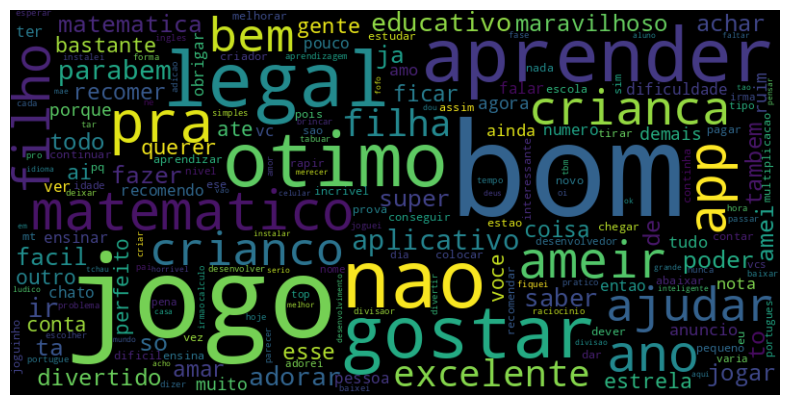

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calcular a contagem de frequência das palavras
word_freq_13 = dict(zip(baseDeDados13.vocabulario, baseDeDados13.matriz_termos.sum(axis=0).tolist()[0]))

# Gerar a nuvem de palavras
wordcloud_13 = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_13)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_13, interpolation='bilinear')
plt.axis("off")
plt.show()

Gerando Nuvem de palavras a partir dos vocabulários das bases de dados 15

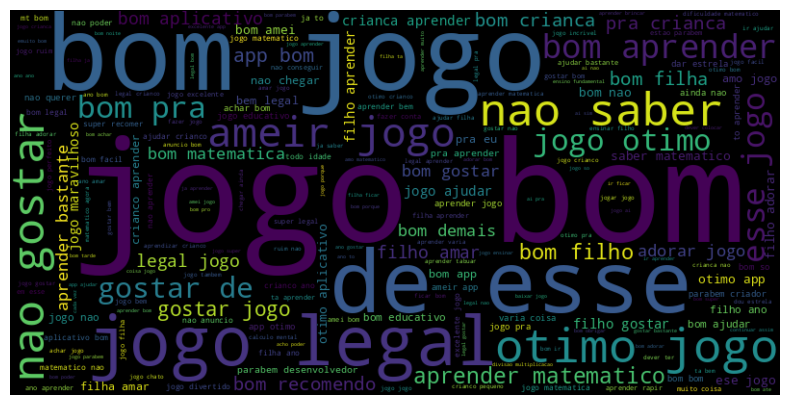

In [ ]:
# Calcular a contagem de frequência das palavras
word_freq_15 = dict(zip(baseDeDados15.vocabulario, baseDeDados15.matriz_termos.sum(axis=0).tolist()[0]))

# Gerar a nuvem de palavras
wordcloud_15 = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_15)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_15, interpolation='bilinear')
plt.axis("off")
plt.show()

Listagem das palavras mais comuns na base de dados 13

In [ ]:
import operator

# Calcular a contagem de frequência das palavras
word_freq_13 = dict(zip(baseDeDados13.vocabulario, baseDeDados13.matriz_termos.sum(axis=0).tolist()[0]))

# Ordenar os itens em ordem decrescente de frequência
sorted_word_freq_13 = sorted(word_freq_13.items(), key=operator.itemgetter(1), reverse=True)

# Imprimir os 20 itens de maior frequência
for word, freq in sorted_word_freq_13[:20]:
    print(word, freq)

bom 841
jogo 621
nao 252
legal 225
otimo 220
aprender 216
gostar 200
pra 123
matematico 107
app 100
ano 95
ameir 93
filho 93
crianca 86
ajudar 81
bem 80
crianco 78
excelente 77
filha 77
aplicativo 74


Listagem dos bigramas mais comuns na base de dados 15

In [ ]:
# Calcular a contagem de frequência das palavras
word_freq_15 = dict(zip(baseDeDados15.vocabulario, baseDeDados15.matriz_termos.sum(axis=0).tolist()[0]))

# Ordenar os itens em ordem decrescente de frequência
sorted_word_freq_15 = sorted(word_freq_15.items(), key=operator.itemgetter(1), reverse=True)

# Imprimir os 20 itens de maior frequência
for word, freq in sorted_word_freq_15[:20]:
    print(word, freq)

jogo bom 92
bom jogo 53
de esse 35
jogo legal 34
otimo jogo 33
nao gostar 30
nao saber 30
ameir jogo 26
bom aprender 25
esse jogo 23
bom pra 21
jogo otimo 20
gostar de 19
aprender matematico 18
bom filho 17
gostar jogo 16
app bom 15
bom crianca 14
bom filha 14
bom recomendo 14
